### Imports

In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions
tfb = tfp.bijectors

import collections.abc as collections

2023-09-14 16:57:36.330319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Exemples

In [2]:
normal = tfd.Normal(
    loc=0,
    scale=1
)

# normal

2023-09-14 16:57:40.074197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 16:57:40.075481: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
# sampling

normal.sample()

normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.3966064 ,  0.45515257,  1.6830219 ,  0.8189058 ,  1.0351465 ,
       -0.00926559,  1.4511418 ,  1.4060088 ,  0.6867684 , -0.874488  ],
      dtype=float32)>

In [4]:
# pdf
normal.prob(0.2)

# log pdf
normal.log_prob(0.2)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9389385>

<Axes: ylabel='Count'>

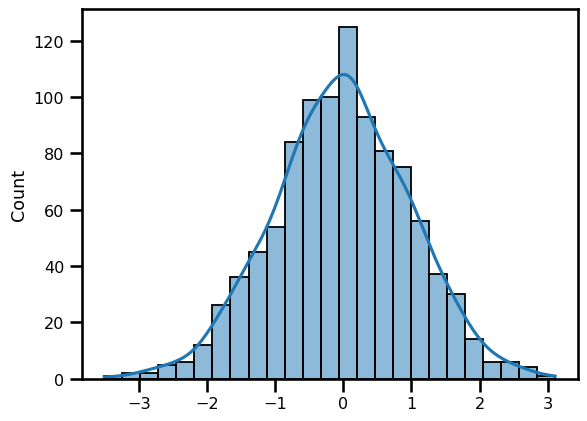

In [5]:
# plot

sns.histplot(data=normal.sample(1000).numpy(), kde=True)

In [6]:
# create batch of 2 distributions

normal_batch = tfd.Normal(
    [0,1],
    [1,2]
)

In [7]:
normal_batch

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [8]:
normal_batch.sample(3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.72628134,  1.8446792 ],
       [ 0.50867957, -0.0309695 ],
       [ 0.7627178 , -4.442031  ]], dtype=float32)>

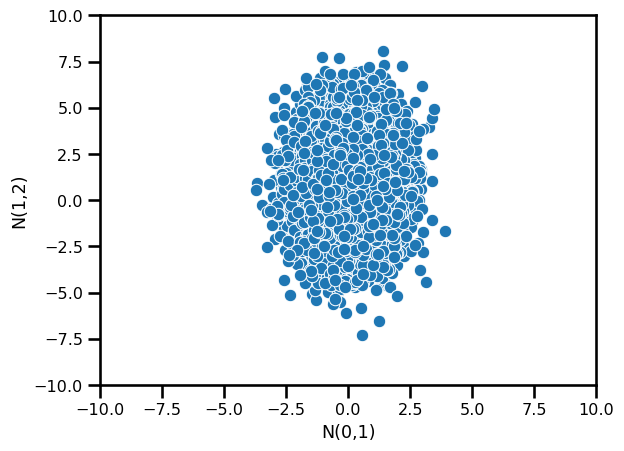

In [9]:
samples = normal_batch.sample(10000).numpy()
ax = sns.scatterplot(x = samples[:,0], y = samples[:,1])
ax.set(ylim=(-10, 10), xlim=(-10, 10), xlabel='N(0,1)', ylabel='N(1,2)');

In [11]:
normal_batch_D = tfd.Normal([[[0., 2],
                             [0.5, 1],
                             [5, 2]]], scale=1)
normal_batch_D

<tfp.distributions.Normal 'Normal' batch_shape=[1, 3, 2] event_shape=[] dtype=float32>

In [12]:
normal_batch_D.sample(10)

<tf.Tensor: shape=(10, 1, 3, 2), dtype=float32, numpy=
array([[[[ 0.00702335,  2.592128  ],
         [ 1.2266021 ,  1.2390703 ],
         [ 5.337931  ,  1.377201  ]]],


       [[[-1.6408457 ,  3.1318774 ],
         [ 0.19132003,  1.5659635 ],
         [ 5.7790174 ,  1.5524724 ]]],


       [[[-0.04262798,  2.7623363 ],
         [ 1.4081268 ,  2.1329784 ],
         [ 4.6641192 ,  3.256616  ]]],


       [[[-0.91365695,  2.5439694 ],
         [-0.9047942 ,  0.8461933 ],
         [ 4.293664  ,  5.182177  ]]],


       [[[-0.01715754,  3.4542413 ],
         [ 0.22510806,  1.4328907 ],
         [ 5.716889  ,  2.3587596 ]]],


       [[[-1.3040217 ,  2.5171716 ],
         [-0.7535366 , -0.01110065],
         [ 5.771102  ,  1.6261429 ]]],


       [[[ 0.35948327,  2.0544007 ],
         [ 0.16457161,  1.3499091 ],
         [ 4.738793  ,  1.5029242 ]]],


       [[[-1.2011768 ,  0.9643599 ],
         [ 0.38219368, -0.06675792],
         [ 3.5236073 ,  2.4327378 ]]],


       [[[-0.95036966,  1